In [1]:
import os
import tensorflow as tf
from numpy import vstack
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from numpy import hstack
 
from PIL import Image
train_images= [[[] for i in range(2)] for i in range(5000)]
s=[[]]
w1=[[]]
p1=[[]] 
w2=[[]]
p2=[[]]
y1=np.array([[1,0,0,0,0],
             [0,1,0,0,0],
             [0,0,1,0,0],
             [0,0,0,1,0],
             [0,0,0,0,1],])
           
   
a=0
num_px=64

for t in range(5):
    if t==0:
        os.chdir('C:\\Users\\Titu\\Desktop\\images\\New folder\\1') 
    if t==1:
        os.chdir('C:\\Users\\Titu\\Desktop\\images\\New folder\\2') 
    if t==2:
        os.chdir('C:\\Users\\Titu\\Desktop\\images\\New folder\\3')
    if t==3:
        os.chdir('C:\\Users\\Titu\\Desktop\\images\\New folder\\4')     
    if t==4:
        os.chdir('C:\\Users\\Titu\\Desktop\\images\\New folder\\5') 
      
        
  
    for f in os.listdir('.'):        
        temp=np.asarray(Image.open(f))
        train_images[a]=temp   
        m=np.resize(temp ,(1,num_px*num_px))
        if a==0:
            
            
            w1=m
            p1=y1[0,:]
        else:
            
            w1=vstack((w1,m)) 
            p1=vstack((p1,y1[t,:]))
        a=a+1
         
 
    
        
      
    

C:\Users\Titu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
import tensorflow as tf
 
 

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

 
 

n_classes = 5
 

x = tf.placeholder('float', [None, 64*64])
y = tf.placeholder('float')

 

def feedforward_neural_network(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([64*64, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)

    output = tf.matmul(l3,output_layer['weights']) + output_layer['biases'] 
     
    return output


prediction = feedforward_neural_network(x) 
 
 
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
optimizer = tf.train.AdamOptimizer().minimize(cost)
 
epochs =30

with tf.Session() as sess:
         
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        epoch_loss = 0
            
         
        epoch_x, epoch_y =w1,p1
        _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
        epoch_loss += c

        print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)

    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
     
    print('Train Accuracy:',accuracy.eval({x:w1, y:p1}))
    
  
    pr1=prediction.eval({x:w1, y:p1})
    
 

Epoch 0 completed out of 30 loss: 28390102.0
Epoch 1 completed out of 30 loss: 19165516.0
Epoch 2 completed out of 30 loss: 13169895.0
Epoch 3 completed out of 30 loss: 11556932.0
Epoch 4 completed out of 30 loss: 13375691.0
Epoch 5 completed out of 30 loss: 13125256.0
Epoch 6 completed out of 30 loss: 10978269.0
Epoch 7 completed out of 30 loss: 8394119.0
Epoch 8 completed out of 30 loss: 6955921.5
Epoch 9 completed out of 30 loss: 6711374.0
Epoch 10 completed out of 30 loss: 6821180.0
Epoch 11 completed out of 30 loss: 6967974.5
Epoch 12 completed out of 30 loss: 6448664.5
Epoch 13 completed out of 30 loss: 5202556.0
Epoch 14 completed out of 30 loss: 3934524.75
Epoch 15 completed out of 30 loss: 3445861.25
Epoch 16 completed out of 30 loss: 3654319.0
Epoch 17 completed out of 30 loss: 3813716.5
Epoch 18 completed out of 30 loss: 3531850.25
Epoch 19 completed out of 30 loss: 2852180.5
Epoch 20 completed out of 30 loss: 2133456.5
Epoch 21 completed out of 30 loss: 1719590.75
Epoch 22 

In [21]:
with tf.Session() as sess:     
       
    d=tf.argmax(pr1, 1) 
    y2=sess.run(d)
 

In [2]:
os.chdir('C:\\Users\\Titu\\Desktop\\images\\New folder\\f')   
g1= [[[] for i in range(2)] for i in range(5000)]        
a=0  
for f in os.listdir('.'): 
    temp=np.asarray(Image.open(f))
    g1[a]=temp      
    a=a+1    
        
  
      

     Train  image       Predicted labels


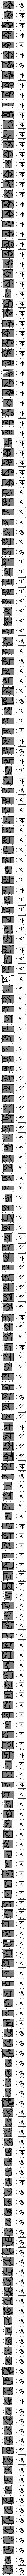

In [23]:
import numpy as np
import matplotlib.pyplot as plt
a=0
k=0
j=0
w=10
h=10
columns = 2
rows =  w1.shape[0]

print('     Train  image       Predicted labels')

fig=plt.figure(figsize=(5,rows*2))

for i in range(1, columns*rows +1):       
     
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    if a%2==0:
        plt.imshow(train_images[j])
        j=j+1
    else:
        if y2[k]==0:
            plt.imshow(g1[0])
        if y2[k]==1:
            plt.imshow(g1[1])
        if y2[k]==2:
            plt.imshow(g1[2])
        if y2[k]==3:
            plt.imshow(g1[3]) 
        if y2[k]==4:
            plt.imshow(g1[4]) 
        k=k+1
            
    a=a+1
     
plt.show() 


In [ ]:

n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

 
 

n_classes = 5
 

x = tf.placeholder('float', [None, num_px*num_px])
y = tf.placeholder('float')

 

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def maxpool2d(x):
    #                        size of window         movement of window
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')



def convolutional_neural_network(x):
    weights = {'W_conv1':tf.Variable(tf.random_normal([5,5,1,32])),
               'W_conv2':tf.Variable(tf.random_normal([5,5,32,64])),
               'W_fc':tf.Variable(tf.random_normal([16*16*64,1024])),
               'out':tf.Variable(tf.random_normal([1024, n_classes]))}

    biases = {'b_conv1':tf.Variable(tf.random_normal([32])),
               'b_conv2':tf.Variable(tf.random_normal([64])),
               'b_fc':tf.Variable(tf.random_normal([1024])),
               'out':tf.Variable(tf.random_normal([n_classes]))}

    x = tf.reshape(x, shape=[-1, 64, 64, 1])

    conv1 = tf.nn.relu(conv2d(x, weights['W_conv1']) + biases['b_conv1'])
    conv1 = maxpool2d(conv1)
    
    conv2 = tf.nn.relu(conv2d(conv1, weights['W_conv2']) + biases['b_conv2'])
    conv2 = maxpool2d(conv2)

    fc = tf.reshape(conv2,[-1, 16*16*64])
    fc = tf.nn.relu(tf.matmul(fc, weights['W_fc'])+biases['b_fc'])
    #fc = tf.nn.dropout(fc, keep_rate)

    output = tf.matmul(fc, weights['out'])+biases['out']
     
    return output


prediction = convolutional_neural_network(x) 
 

#cost =  (tf.reduce_mean(tf.square(y - prediction)))  
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
optimizer = tf.train.AdamOptimizer().minimize(cost)
 
epochs =50

with tf.Session() as sess:
         
    sess.run(tf.global_variables_initializer())

    for epoch in range(epochs):
        epoch_loss = 0
            
         
        epoch_x, epoch_y =w1,p1
        _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
        epoch_loss += c

        print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)

    correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
     
    print('Train Accuracy:',accuracy.eval({x:w1, y:p1}))
    
    pr1=prediction.eval({x:w1, y:p1})
    

Epoch 0 completed out of 50 loss: 33687524.0


In [25]:
with tf.Session() as sess:     
       
    d=tf.argmax(pr1, 1) 
    y2=sess.run(d)

     Train  image       Predicted labels


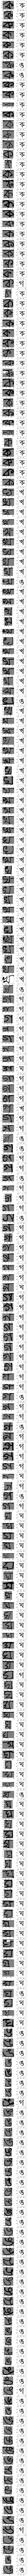

In [26]:
import numpy as np
import matplotlib.pyplot as plt
a=0
k=0
j=0
w=10
h=10
columns = 2
rows =  w1.shape[0]

print('     Train  image       Predicted labels')

fig=plt.figure(figsize=(5,rows*2))

for i in range(1, columns*rows +1):       
     
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    if a%2==0:
        plt.imshow(train_images[j])
        j=j+1
    else:
        if y2[k]==0:
            plt.imshow(g1[0])
        if y2[k]==1:
            plt.imshow(g1[1])
        if y2[k]==2:
            plt.imshow(g1[2])
        if y2[k]==3:
            plt.imshow(g1[3]) 
        if y2[k]==4:
            plt.imshow(g1[4]) 
        k=k+1
            
    a=a+1
     
plt.show() 
